In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset_df = pd.read_csv("data_dropout_ml_good.csv")
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   float64
 5   Previous qualification                          4424 non-null   int64  
 6   PQ_student_encoded                              4424 non-null   int64  
 7   PQ_student_named                                4424 non-null   object 
 8   Previous qualification /10                      4424 non-null   object 
 9   Nacionality                              

In [34]:
# Calculer les quartiles pour les variables numériques
numerical_columns = dataset_df.columns[0:34].tolist()

# Obtenir les quartiles pour les variables numériques
quartiles = dataset_df[numerical_columns].quantile([0.25, 0.5, 0.75])

# Afficher les quartiles
print("Quartiles pour chaque variable:\n", quartiles)

Quartiles pour chaque variable:
       Marital status  Application order  Course  Daytime/evening attendance\t  \
0.25             1.0                1.0  9085.0                           1.0   
0.50             1.0                1.0  9238.0                           1.0   
0.75             1.0                2.0  9556.0                           1.0   

      Previous qualification  PQ_student_encoded  Nacionality  \
0.25                     1.0                 3.0          1.0   
0.50                     1.0                 3.0          1.0   
0.75                     1.0                 3.0          1.0   

      Mother's qualification  MQ_encoded  MQ_encoded.1  ...  FO_encoded  \
0.25                     2.0         2.0           2.0  ...         5.0   
0.50                    19.0         3.0           3.0  ...         5.0   
0.75                    37.0         3.0           3.0  ...         6.0   

      Salaire_père  Revenu_foyer  Displaced  Educational special needs  \
0.25  

/Users/luciebroyde/.pyenv/versions/Artefact/lib/python3.10/site-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/luciebroyde/.pyenv/versions/Artefact/lib/python3.10/site-packages/seaborn/utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
/Users/luciebroyde/.pyenv/versions/Artefact/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


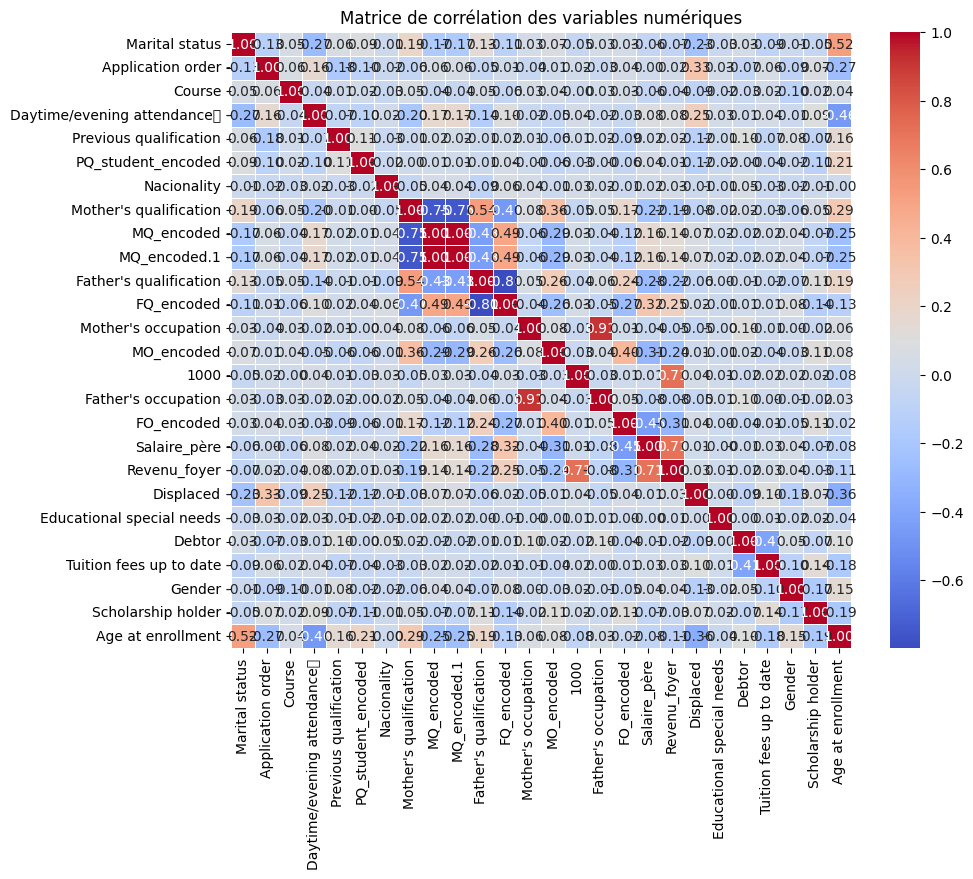

In [35]:
# Corrélations entre les variables
correlation_matrix = dataset_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

In [36]:
dataset_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,PQ_student_encoded,PQ_student_named,Previous qualification /10,Nacionality,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),"CU 2nd sem (grade, number)",Curricular units 2nd sem (without evaluations),Year,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1.0,1,3,Lycée terminé,"12,2",1,...,0,0,0,"0,00",0,2010,"10,8","1,4","1,74",Dropout
1,1,15,1,9254,1.0,1,3,Lycée terminé,"16,0",1,...,6,6,6,"13,67",0,2014,"13,9","-0,3","0,79",Graduate
2,1,1,5,9070,1.0,1,3,Lycée terminé,"12,2",1,...,6,0,0,"0,00",0,2010,"10,8","1,4","1,74",Dropout
3,1,17,2,9773,1.0,1,3,Lycée terminé,"12,2",1,...,6,10,5,"12,40",0,2009,"9,4","-0,8","-3,12",Graduate
4,2,39,1,8014,0.0,1,3,Lycée terminé,"10,0",1,...,6,6,6,"13,00",0,2014,"13,9","-0,3","0,79",Graduate


In [37]:
print(dataset_df['Gender'].nunique())
print(dataset_df['Gender'].unique())

2
[1 0]


In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_selector, make_column_transformer

In [39]:
# Liste des colonnes à convertir en numériques
numeric_columns = [
    'Previous qualification /10', 'CU 1st sem (grade, number)',  
    'Unemployment rate', 'Inflation rate', 'GDP', 'CU 2nd sem (grade, number)', 'Admission grade'
]

# Convertir les colonnes numériques en types numériques en remplaçant les virgules par des points
for col in numeric_columns:
    # Convertir d'abord en chaîne de caractères, puis remplacer les virgules par des points si nécessaire
    dataset_df[col] = dataset_df[col].astype(str).str.replace(',', '.')
    
    # Essayer de convertir les valeurs en float, en forçant la gestion des erreurs
    dataset_df[col] = pd.to_numeric(dataset_df[col], errors='coerce')
    
# Afficher les informations après conversion pour vérifier
dataset_df.info()

# Vérifier les premières lignes pour s'assurer que la conversion s'est bien déroulée
dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   float64
 5   Previous qualification                          4424 non-null   int64  
 6   PQ_student_encoded                              4424 non-null   int64  
 7   PQ_student_named                                4424 non-null   object 
 8   Previous qualification /10                      4424 non-null   float64
 9   Nacionality                              

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,PQ_student_encoded,PQ_student_named,Previous qualification /10,Nacionality,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),"CU 2nd sem (grade, number)",Curricular units 2nd sem (without evaluations),Year,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1.0,1,3,Lycée terminé,12.2,1,...,0,0,0,0.00,0,2010,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1.0,1,3,Lycée terminé,16.0,1,...,6,6,6,13.67,0,2014,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1.0,1,3,Lycée terminé,12.2,1,...,6,0,0,0.00,0,2010,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1.0,1,3,Lycée terminé,12.2,1,...,6,10,5,12.40,0,2009,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0.0,1,3,Lycée terminé,10.0,1,...,6,6,6,13.00,0,2014,13.9,-0.3,0.79,Graduate


In [70]:
dataset_df = dataset_df.dropna()
dataset_df.shape

(4279, 51)

In [71]:
X = dataset_df.drop(columns="Target")
y = dataset_df["Target"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )
X_train.shape

(3423, 50)

perte de 4424 - 3539 = 885 lignes

In [73]:
# 4. Vérifier la présence de NaN dans X_train et X_test
print("NaN dans X_train avant transformation :")
print(X_train.isna().sum())
print("NaN dans X_test avant transformation :")
print(X_test.isna().sum())

NaN dans X_train avant transformation :
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
PQ_student_encoded                                0
PQ_student_named                                  0
Previous qualification /10                        0
Nacionality                                       0
Mother's qualification                            0
MQ_encoded                                        0
MQ_encoded.1                                      0
MQ_named                                          0
Father's qualification                            0
FQ_encoded                                        0
FQ_named                                          0
Mother's occupation                               0
MO_encoded              

In [74]:
# création de la pipeline

# encoder la colonne Target car erreur sur le pipe.fit avec application lin_reg "ValueError: could not convert string to float: 'Graduate'"

one_hot_encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = one_hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(y_test.values.reshape(-1, 1))

In [75]:
cat_features_selector = make_column_selector(dtype_include='object')
num_features_selector = make_column_selector(dtype_include=['float64', 'int64'])

In [76]:
# Sélectionner les colonnes catégorielles avec make_column_selector
cat_columns = cat_features_selector(X_train)  # On passe X_train pour sélectionner les colonnes dans le DataFrame

# Vérifier les catégories uniques pour chaque colonne catégorielle
for col in cat_columns:
    print(f"Nombre de catégories pour {col}: {X_train[col].nunique()}")
    print(f"Valeurs uniques pour {col}: {X_train[col].unique()}")

Nombre de catégories pour Application mode: 18
Valeurs uniques pour Application mode: ['39' '17' '44' '7' '1' '51' '18' '42' '43' '16' '53' '10' '2' '15' '5'
 '26' '#VALUE!' '57']
Nombre de catégories pour PQ_student_named: 7
Valeurs uniques pour PQ_student_named: ['Lycée terminé' 'Lycée professionnel et technologique' 'Licence' 'Master'
 'Lycée non terminé' 'Bachelor' 'Doctorat']
Nombre de catégories pour MQ_named: 5
Valeurs uniques pour MQ_named: ['Lycée' 'Collège' 'Master' 'Illitrisme' 'Doctorat']
Nombre de catégories pour FQ_named: 6
Valeurs uniques pour FQ_named: ['Lycée' 'Collège' 'Licence' 'Master' 'Doctorat' 'Illitrisme']
Nombre de catégories pour MO_named: 6
Valeurs uniques pour MO_named: ['Ouvriers' 'Employés' 'Professions intermédiaires' 'Etudiant'
 'Cadres et professions intellectuelles' 'Agriculteurs exploitants']
Nombre de catégories pour FO_named: 6
Valeurs uniques pour FO_named: ['Ouvriers' 'Employés' 'Professions intermédiaires'
 'Agriculteurs exploitants' 'Etudiant'
 

from sklearn.impute import SimpleImputer
preproc = make_column_transformer(
    (SimpleImputer(strategy='mean'), num_features_selector),
    (StandardScaler(), num_features_selector), 
    (OneHotEncoder(handle_unknown='ignore'), cat_features_selector)
    )
preproc

In [77]:
from sklearn.impute import SimpleImputer
preproc = make_column_transformer(
    (StandardScaler(), num_features_selector), 
    (OneHotEncoder(handle_unknown='ignore'), cat_features_selector)
    )
preproc

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x108487430>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x108487370>)])

In [78]:
X_train_scaled = preproc.fit_transform(X_train)
X_train_scaled.shape

(3423, 92)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# créer pipeline pour random forest
pipeline_rf = make_pipeline(preproc, RandomForestClassifier(n_estimators=100, random_state=0))
pipeline_rf.fit(X_train, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x108487430>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x108487370>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

À partir des informations fournies, il semble que y_train contient des valeurs de type object (chaînes de caractères), ce qui indique qu'il s'agit d'une classification multiclass avec trois classes possibles : Graduate, Enrolled, et Dropout.

In [ ]:
from sklearn.linear_model import LinearRegression

# créer pipeline pour linear regression
pipeline_lr = make_pipeline(
    preproc,  # Appliquer le préprocessing
    LinearRegression()  # Appliquer le modèle Régression Linéaire
)

# 7. Entraîner le modèle Régression Linéaire
pipeline_lr.fit(X_train, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x108487430>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x108487370>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# créer une pipeline parllèle avec voting classifier pour combiner les 2

In [85]:
# Calculer la Permutation Feature Importance pour RandomForest
perm_importance = permutation_importance(pipeline_rf, X_test, y_test_encoded, n_repeats=10, random_state=0)

# 8. Afficher les résultats de l'importance des caractéristiques
print("Permutation Feature Importance :")
# Extraire l'importance des caractéristiques à partir de la pipeline
feature_names = X.columns  # Récupérer les noms des caractéristiques d'origine
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<30} {perm_importance.importances_mean[i]:.3f} +/- {perm_importance.importances_std[i]:.3f}")

Permutation Feature Importance :
Curricular units 2nd sem (approved) 0.171 +/- 0.017
Curricular units 1st sem (approved) 0.108 +/- 0.011
CU 2nd sem (grade, number)     0.043 +/- 0.010
Tuition fees up to date        0.035 +/- 0.006
CU 1st sem (grade, number)     0.014 +/- 0.004
Curricular units 2nd sem (enrolled) 0.008 +/- 0.003
Curricular units 2nd sem (evaluations) 0.008 +/- 0.004
Course                         0.008 +/- 0.003
Scholarship holder             0.006 +/- 0.005
Inflation rate                 0.004 +/- 0.002
Displaced                      0.004 +/- 0.003
Curricular units 1st sem (enrolled) 0.004 +/- 0.003
Father's occupation            0.003 +/- 0.003
Application mode               0.003 +/- 0.004
Unemployment rate              0.003 +/- 0.002
PQ_student_named               0.003 +/- 0.001
Father's qualification         0.003 +/- 0.003
Previous qualification /10     0.003 +/- 0.004
Admission grade                0.002 +/- 0.001
Mother's qualification         0.002 +/- 0.001

In [90]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# comparaisons des 2 modèles
# random forest
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)

# régression linéaire
y_pred_lr = pipeline_lr.predict(X_test)
mse_lr = mean_squared_error(y_test_encoded, y_pred_lr)
r2_lr = r2_score(y_test_encoded, y_pred_lr)

# Affichage des résultats de comparaison
print("\nComparaison des performances:")
print(f"Accuracy du Random Forest : {accuracy_rf:.3f}")
print(f"MSE de la Régression Linéaire : {mse_lr:.3f}")
print(f"R2 de la Régression Linéaire : {r2_lr:.3f}")


Comparaison des performances:
Accuracy du Random Forest : 0.679
MSE de la Régression Linéaire : 0.119
R2 de la Régression Linéaire : 0.371


In [91]:
# mise en place d'une gridSearch pour fin tune les parmaètres de la random forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [10, 20, None],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Afficher la meilleure performance
print("Meilleure performance : ", grid_search.best_score_)

Meilleurs paramètres trouvés :  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Meilleure performance :  0.6701750117385923
